In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [4]:
# import data
data = pd.read_csv('hcp_drug_prediction_data_cleaned.csv')
print(data)

      Subject  PSQI_Score  PicSeq_AgeAdj  CardSort_AgeAdj  Flanker_AgeAdj  \
0      100004           8         112.44            88.64          111.01   
1      100206           6         118.78           104.94          116.55   
2      100307           4         103.45           109.92          101.90   
3      100408           4         125.19           100.77          113.51   
4      100610           4         101.69           115.18          114.18   
...       ...         ...            ...              ...             ...   
1164   992774           2          77.27           116.01          115.80   
1165   993675           4         101.07           106.41          106.46   
1166   994273           8          73.89           101.91          115.11   
1167   995174           7         101.12           109.51           87.88   
1168   996782           4          86.78           103.13           90.90   

      PMAT24_A_CR  PMAT24_A_SI  PMAT24_A_RTCR  ReadEng_AgeAdj  \
0         

In [5]:
data["Age_recoded"] = data["Age_recoded"].astype('category')
data["Gender_recoded"] = data["Gender_recoded"].astype('category')
data["sub_use"] = data["sub_use"].astype('category')

In [6]:
print(data.shape)

(1169, 75)


In [7]:
print(data.dtypes)

Subject               int64
PSQI_Score            int64
PicSeq_AgeAdj       float64
CardSort_AgeAdj     float64
Flanker_AgeAdj      float64
                     ...   
NEOFAC_N            float64
NEOFAC_E            float64
sub_use            category
Age_recoded        category
Gender_recoded     category
Length: 75, dtype: object


In [8]:
#array = dataframe.values
X = data.drop(['Subject','sub_use'], axis = 1)
y = data.loc[:,'sub_use']

In [9]:
print(X.shape)
print(X.iloc[:,0:71])

(1169, 73)
      PSQI_Score  PicSeq_AgeAdj  CardSort_AgeAdj  Flanker_AgeAdj  PMAT24_A_CR  \
0              8         112.44            88.64          111.01         19.0   
1              6         118.78           104.94          116.55         20.0   
2              4         103.45           109.92          101.90         17.0   
3              4         125.19           100.77          113.51          7.0   
4              4         101.69           115.18          114.18         23.0   
...          ...            ...              ...             ...          ...   
1164           2          77.27           116.01          115.80         14.0   
1165           4         101.07           106.41          106.46         21.0   
1166           8          73.89           101.91          115.11         20.0   
1167           7         101.12           109.51           87.88         19.0   
1168           4          86.78           103.13           90.90         20.0   

      PMAT24_A_S

In [10]:
# pull out continuous vars
X_con = X.iloc[:,0:71]

# standardize continuous vars
scaler = StandardScaler()
X.iloc[:,0:71] = scaler.fit_transform(X_con)

In [11]:
print(X)

      PSQI_Score  PicSeq_AgeAdj  CardSort_AgeAdj  Flanker_AgeAdj  PMAT24_A_CR  \
0       1.119884       0.457481        -1.313371        0.952953     0.474977   
1       0.408586       0.834918         0.303455        1.501609     0.679038   
2      -0.302713      -0.077716         0.797429        0.050741     0.066856   
3      -0.302713       1.216521        -0.110175        1.200542    -1.973748   
4      -0.302713      -0.182493         1.319178        1.266895     1.291219   
...          ...            ...              ...             ...          ...   
1164   -1.014011      -1.636278         1.401507        1.427333    -0.545325   
1165   -0.302713      -0.219404         0.449266        0.502342     0.883098   
1166    1.119884      -1.837498         0.002904        1.358998     0.679038   
1167    0.764235      -0.216427         0.756761       -1.337735     0.474977   
1168   -0.302713      -1.070124         0.123918       -1.038648     0.679038   

      PMAT24_A_SI  PMAT24_A

In [12]:
print(X_con)

      PSQI_Score  PicSeq_AgeAdj  CardSort_AgeAdj  Flanker_AgeAdj  PMAT24_A_CR  \
0              8         112.44            88.64          111.01         19.0   
1              6         118.78           104.94          116.55         20.0   
2              4         103.45           109.92          101.90         17.0   
3              4         125.19           100.77          113.51          7.0   
4              4         101.69           115.18          114.18         23.0   
...          ...            ...              ...             ...          ...   
1164           2          77.27           116.01          115.80         14.0   
1165           4         101.07           106.41          106.46         21.0   
1166           8          73.89           101.91          115.11         20.0   
1167           7         101.12           109.51           87.88         19.0   
1168           4          86.78           103.13           90.90         20.0   

      PMAT24_A_SI  PMAT24_A

/Applications/anaconda3/envs/psych_pheno/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Applications/anaconda3/envs/psych_pheno/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/envs/psych_pheno/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/envs/psych_pheno/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/e

/Applications/anaconda3/envs/psych_pheno/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/envs/psych_pheno/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/envs/psych_pheno/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/envs/psych_pheno/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/envs/psych_pheno/lib/python3.7/site-packages/skl

/Applications/anaconda3/envs/psych_pheno/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/envs/psych_pheno/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/envs/psych_pheno/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/envs/psych_pheno/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/envs/psych_pheno/lib/python3.7/site-packages/skl

/Applications/anaconda3/envs/psych_pheno/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/envs/psych_pheno/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/envs/psych_pheno/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/envs/psych_pheno/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/envs/psych_pheno/lib/python3.7/site-packages/skl

/Applications/anaconda3/envs/psych_pheno/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/envs/psych_pheno/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/envs/psych_pheno/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/envs/psych_pheno/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/envs/psych_pheno/lib/python3.7/site-packages/skl

/Applications/anaconda3/envs/psych_pheno/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/envs/psych_pheno/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/envs/psych_pheno/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/envs/psych_pheno/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/envs/psych_pheno/lib/python3.7/site-packages/skl

Optimalselected_features = feature_names[rfecv.support_].tolist() number of features : 47


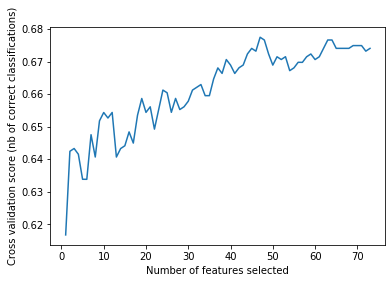

(73,)

In [13]:
# feature extraction
model = LogisticRegression(class_weight='balanced')

# The "accuracy" scoring is proportional to the number of correct classifications
# cv default is 3-fold
rfecv = RFECV(estimator=model,step=1,scoring='accuracy') 
rfecv.fit(X, y)

print("Optimalselected_features = feature_names[rfecv.support_].tolist() number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

rfecv.grid_scores_.shape

In [14]:
X.corrwith(y).sort_values()

NEOFAC_C          -0.142834
VSPLOT_OFF        -0.133779
NEOFAC_A          -0.105621
PMAT24_A_SI       -0.090790
MeanPurp_Unadj    -0.069325
                     ...   
NEOFAC_O           0.124308
VSPLOT_TC          0.134916
FearSomat_Unadj    0.151082
AngAffect_Unadj    0.162642
AngAggr_Unadj      0.204576
Length: 71, dtype: float64

In [65]:
# np.array(np.where(rfecv.ranking_==1))

cols = np.array(X.columns)
print(cols)

['PSQI_Score' 'PicSeq_AgeAdj' 'CardSort_AgeAdj' 'Flanker_AgeAdj'
 'PMAT24_A_CR' 'PMAT24_A_SI' 'PMAT24_A_RTCR' 'ReadEng_AgeAdj'
 'PicVocab_AgeAdj' 'ProcSpeed_AgeAdj' 'DDisc_SV_1mo_200'
 'DDisc_SV_6mo_200' 'DDisc_SV_1yr_200' 'DDisc_SV_3yr_200'
 'DDisc_SV_5yr_200' 'DDisc_SV_10yr_200' 'DDisc_SV_1mo_40K'
 'DDisc_SV_6mo_40K' 'DDisc_SV_1yr_40K' 'DDisc_SV_3yr_40K'
 'DDisc_SV_5yr_40K' 'DDisc_SV_10yr_40K' 'DDisc_AUC_200' 'DDisc_AUC_40K'
 'VSPLOT_TC' 'VSPLOT_CRTE' 'VSPLOT_OFF' 'SCPT_TP' 'SCPT_TN' 'SCPT_FP'
 'SCPT_FN' 'SCPT_TPRT' 'SCPT_SEN' 'SCPT_SPEC' 'SCPT_LRNR' 'IWRD_TOT'
 'IWRD_RTC' 'ListSort_AgeAdj' 'CogFluidComp_AgeAdj' 'CogEarlyComp_AgeAdj'
 'CogTotalComp_AgeAdj' 'CogCrystalComp_AgeAdj' 'ER40_CR' 'ER40_CRT'
 'ER40ANG' 'ER40FEAR' 'ER40HAP' 'ER40NOE' 'ER40SAD' 'AngAffect_Unadj'
 'AngHostil_Unadj' 'AngAggr_Unadj' 'FearAffect_Unadj' 'FearSomat_Unadj'
 'Sadness_Unadj' 'LifeSatisf_Unadj' 'MeanPurp_Unadj' 'PosAffect_Unadj'
 'Friendship_Unadj' 'Loneliness_Unadj' 'PercHostil_Unadj'
 'PercReject_Unad

In [67]:
idx = np.where(rfecv.ranking_ == 1)[0]
idx = idx.tolist()
print(idx)

[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18, 21, 24, 26, 31, 32, 34, 36, 37, 38, 39, 40, 43, 44, 46, 49, 51, 52, 53, 55, 56, 57, 59, 62, 64, 65, 67, 68, 69, 70, 71, 72]


In [68]:
ranked_features = cols[idx]
print(ranked_features)

['PSQI_Score' 'PicSeq_AgeAdj' 'CardSort_AgeAdj' 'Flanker_AgeAdj'
 'PMAT24_A_CR' 'PMAT24_A_SI' 'ReadEng_AgeAdj' 'PicVocab_AgeAdj'
 'ProcSpeed_AgeAdj' 'DDisc_SV_1mo_200' 'DDisc_SV_6mo_200'
 'DDisc_SV_1yr_200' 'DDisc_SV_3yr_200' 'DDisc_SV_5yr_200'
 'DDisc_SV_1mo_40K' 'DDisc_SV_1yr_40K' 'DDisc_SV_10yr_40K' 'VSPLOT_TC'
 'VSPLOT_OFF' 'SCPT_TPRT' 'SCPT_SEN' 'SCPT_LRNR' 'IWRD_RTC'
 'ListSort_AgeAdj' 'CogFluidComp_AgeAdj' 'CogEarlyComp_AgeAdj'
 'CogTotalComp_AgeAdj' 'ER40_CRT' 'ER40ANG' 'ER40HAP' 'AngAffect_Unadj'
 'AngAggr_Unadj' 'FearAffect_Unadj' 'FearSomat_Unadj' 'LifeSatisf_Unadj'
 'MeanPurp_Unadj' 'PosAffect_Unadj' 'Loneliness_Unadj' 'EmotSupp_Unadj'
 'PercStress_Unadj' 'SelfEff_Unadj' 'NEOFAC_O' 'NEOFAC_C' 'NEOFAC_N'
 'NEOFAC_E' 'Age_recoded' 'Gender_recoded']
